# POC-Turtle-8: Test MST-parses `2018-04-22`

Data for AGI-2018 paper: learn grammar with various Grammar Learner settings using various parses of "POC-English-NoAmb" corpus.

## Grammar Learner POC.0.3: 
- Separate category learning and grammar learning,
- Clustering option: grouping identical contexts (former "Identical Lexical Entries" branch,
- Link Grammar rules based on connector sets ("relaxed rules") or disjunct sets ("strict rules");  

Tests: "POC-Turtle" corpus: [http://88.99.210.144/data/clustering_2018/data/POC_Turtle/](http://88.99.210.144/data/clustering_2018/data/POC_Turtle/);  
Test results: [http://88.99.210.144/data/clustering_2018/AGI-2018/POC-Turtle/](http://88.99.210.144/data/clustering_2018/AGI-2018/POC-Turtle/).  

A static html copy of this notebook is shared via  
[http://88.99.210.144/data/clustering_2018/html/POC-Turtle-8-Test-MST-parses.html](http://88.99.210.144/data/clustering_2018/html/POC-Turtle-8-Test-MST-parses.html)

## Basic settings

In [1]:
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.utl.utl import UTC
from src.utl.read_files import check_dir
from src.grammar_learner.poc03 import learn_grammar

input_dir = module_path + '/data/POC-Turtle/MST_fixed_manually/'
print('Baseline dataset:\n-', input_dir)
input_batch = module_path + '/data/POC-Turtle/'
dirs = sorted([x[0] for x in os.walk(input_batch)])[1:]
print('Input data directory structure (input_batch subdirs):')
for d in dirs: print('-',d)
out_dir = module_path + '/output/AGI-2018-paper-data-' + str(UTC())[:10] + '/'
print('Output data directory (out_dir):\n-', out_dir)
prefix = '' # unused option
tmpath = module_path + '/tmp/'
check_dir(tmpath, True, 'none')
print(UTC())

Baseline dataset:
- /home/oleg/language-learning/data/POC-Turtle/MST_fixed_manually/
Input data directory structure (input_batch subdirs):
- /home/oleg/language-learning/data/POC-Turtle/LG_ANY_all_parses
- /home/oleg/language-learning/data/POC-Turtle/MST_fixed_manually
- /home/oleg/language-learning/data/POC-Turtle/R=6_Weight=1
- /home/oleg/language-learning/data/POC-Turtle/R=6_Weight=6:R
Output data directory (out_dir):
- /home/oleg/language-learning/output/AGI-2018-paper-data-2018-04-22/
2018-04-22 17:33:50 UTC


## Grammar Learner test call, parameters

In [2]:
def test_learn_grammar(input_dir, prj_dir, left_wall, period, context, word_space, \
                       dim_reduction, clustering, grammar_rules, \
                       verbose = 'none'):
    # Directory to read parse files (1 to many input files)
    #-input_dir = module_path + '/data/POC_Turtle/mst_fixed_manually/'
    # Paths to store learned categories, learned dictionary Link Grammar file
    if check_dir(prj_dir, create=True, verbose='none'):
        cat_path = prj_dir  # Path to store learned categories
        dict_path = prj_dir # Path to store learned dictionary Link Grammar file
    # Settings:
    parse_mode = 'given'        # 'given' (default) / 'explosive' (next)
    #^left_wall = 'LEFT-WALL'     # '','none' / 'ABC' - replace ###LEFT-WALL### with ABC
    #^period = True               # use period in links learning: True/False
    #^context = 1                 # 1: connectors / 0: 'words' /
    #^context = 2               # 2,3...: disjuncts with limited number of links
    window = 'mst'              # 'mst' / reserved options for «explosive» parsing
    weighting = 'ppmi'          # 'ppmi' / future options
    group = True                # group items after link parsing, sum counts 
    #^word_space = 'vectors'      # 'vectors' - dimensionality reduction with SVM
    #^word_space = 'discrete'     #  'discrete' - no dimensionality reduction
    dim_max = 100               # max vector space dimensionality
    sv_min = 0.1                # minimal singular value (fraction of the max value)
    #^dim_reduction = 'svm'     # 'svm' / 'none' (discrete word_space, group)
    #^dim_reduction = 'none'
    #^clustering = 'kmeans'     # 'kmeans' / 'group' / future options
    #^clustering = 'group'      # grouping identical lexical entries
    cluster_range = (2,48,1)    # min, max, step
    cluster_criteria = 'silhouette'
    #-cluster_level = 0.9       # level = 0, 1, 0.-0.99..: 0 - max number of clusters
    cluster_level = 1           # 2018-04-21: strict max
    generalization = 'off'      # 'off' / future options: 'cosine', ...
    merge = 0.8                 # merge clusters with similarity > this 'merge' criteria
    aggregate = 0.2             # agglomerate clusters with similarity > this criteria
    #^grammar_rules = 2           # 1: 'connectors' / 2 - 'disjuncts' / 0 - 'words' (TODO?)
    #^verbose='mid'               # 'none', 'min', 'mid', 'max'
    
    lg_rules = learn_grammar(input_dir, cat_path, dict_path, tmpath, verbose, \
        parse_mode, left_wall, period, context, window, weighting, group, \
        word_space, dim_max, sv_min, dim_reduction, \
        clustering, cluster_range, cluster_criteria, cluster_level,
        generalization, merge, aggregate, grammar_rules)
    
    return lg_rules  # .dict ⇒ string

print(UTC())

2018-04-22 17:33:50 UTC


# LEFT-WALL and period

In [3]:
left_wall = 'LEFT-WALL'
period = True
verbose = 'none'
batch_dir = out_dir + 'POC-Turtle-LEFT-WALL+period/'
print('Output data directory (batch_dir):', batch_dir)

Output data directory (batch_dir): /home/oleg/language-learning/output/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/


## «Connectors-DRK-disjuncts», MST_fixed dataset, detailed
- Word space context terms - connectors;  
- DRK - dimensionality reduction (SVM) and K-means clustering;  
- Link Grammar rules based on disjuncts.

15 unique words and 28 unique links form 64 unique word-link pairs from 64 parsed items


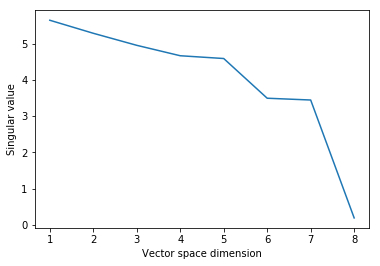

Vector space dimensionality = 7
Singular value (7) = 3.4
Max singular value (1) = 5.6
Singular value (7) = 0.19275911971807783
/poc03/category_learner: number of clusters = 6


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['has', 'isa']","[0, 0]"
C00,C02,0.0,['.'],[0]
C00,C03,0.0,['LEFT-WALL'],[0]
C00,C04,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C05,0.0,"['feather', 'fin', 'scale', 'wing']","[0, 0, 0, 0]"
C00,C06,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"



Category list - 6 lines, saved to /home/oleg/language-learning/output/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/MST_fixed_manually/connectors-DRK-disjuncts/6_categories.txt
15 unique words and 29 unique links form 44 unique word-link pairs from 60 parsed items


Cluster,Germs,L,R,Disjuncts
C01,"['has', 'isa']",[],[],"['C05C01- & C01C04+', 'C05C01- & C01C05+', 'C06C01- & C01C04+', 'C06C01- & C01C05+']"
C02,['.'],[],[],"['C04C02-', 'C05C02-']"
C03,['LEFT-WALL'],[],[],"['C03C05+', 'C03C06+']"
C04,"['bird', 'extremity', 'fish']",[],[],['C01C04- & C04C02+']
C05,"['feather', 'fin', 'scale', 'wing']",[],[],"['C01C05- & C05C02+', 'C03C05- & C05C01+']"
C06,"['eagle', 'herring', 'parrot', 'tuna']",[],[],['C03C06- & C06C01+']


In [4]:
context = 1                 # 1: connectors / 2: disjuncts /
word_space = 'vectors'      # 'vectors' - dimensionality reduction with SVM
dim_reduction = 'svm'       # 'svm' / 'none' (discrete word_space, group)
clustering = 'kmeans'       # 'kmeans' / 'group' / future options
generalization = 'off'      # 'off' / future options: 'cosine', ...
grammar_rules = 2           # 1: connectors / 2 - disjuncts
verbose = 'mid'
subdir = 'connectors-DRK-disjuncts/'
prj_dir = batch_dir + 'MST_fixed_manually/' + subdir
#-print(prj_dir)
lg_rules = test_learn_grammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)

In [5]:
print('LG rules file saved to ..' + lg_rules.split('\n')[-1][63:])

LG rules file saved to ..ut/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/MST_fixed_manually/connectors-DRK-disjuncts/poc-turtle_6C_2018-04-22_0008.4.0.dict


In [6]:
print(lg_rules)

% Grammar Learner v.0.8 2018-04-22 17:33:52 UTC
<dictionary-version-number>: V0v0v8+;
<dictionary-locale>: EN4us+;

% C01
"has" "isa":
(C05C01- & C01C04+) or (C05C01- & C01C05+) or (C06C01- & C01C04+) or (C06C01- & C01C05+);

% C02
".":
(C04C02-) or (C05C02-);

% C03
"LEFT-WALL":
(C03C05+) or (C03C06+);

% C04
"bird" "extremity" "fish":
(C01C04- & C04C02+);

% C05
"feather" "fin" "scale" "wing":
(C01C05- & C05C02+) or (C03C05- & C05C01+);

% C06
"eagle" "herring" "parrot" "tuna":
(C03C06- & C06C01+);

UNKNOWN-WORD: XXX+;

% 6 word clusters, 6 Link Grammar rules.
% Link Grammar file saved to: /home/oleg/language-learning/output/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/MST_fixed_manually/connectors-DRK-disjuncts/poc-turtle_6C_2018-04-22_0008.4.0.dict


## «Connectors - DRK - connectors/disjuncts», batch mode

In [7]:
left_wall = 'LEFT-WALL'
period = True
context = 1
grammar_rules = 2
word_space = 'vectors'
dim_reduction = 'svm'
clustering = 'kmeans'
generalization = 'off'
verbose = 'none'
print('Link Grammar rule files saved to\n' + batch_dir[35:] + ':')
for d in dirs:
    for i,context in enumerate(['connectors']):
        print('')
        for j,rules in enumerate(['connectors', 'disjuncts']):
            prj_dir = batch_dir + d[d.rfind('/')+1:] + '/'+context+'-DRK-'+rules+'/'
            lg_rules = test_learn_grammar(d, prj_dir, left_wall, period, i+1, \
                word_space, dim_reduction, clustering, j+1, verbose)
            print('.'+lg_rules.split('\n')[-1][124:])

Link Grammar rule files saved to
/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/:

./LG_ANY_all_parses/connectors-DRK-connectors/poc-turtle_6C_2018-04-22_0008.4.0.dict
./LG_ANY_all_parses/connectors-DRK-disjuncts/poc-turtle_6C_2018-04-22_0008.4.0.dict

./MST_fixed_manually/connectors-DRK-connectors/poc-turtle_6C_2018-04-22_0008.4.0.dict
./MST_fixed_manually/connectors-DRK-disjuncts/poc-turtle_6C_2018-04-22_0008.4.0.dict

Clusters: [7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8] ⇒ 8
./R=6_Weight=1/connectors-DRK-connectors/poc-turtle_8C_2018-04-22_0008.4.0.dict
Clusters: [7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9] ⇒ 7
./R=6_Weight=1/connectors-DRK-disjuncts/poc-turtle_7C_2018-04-22_0008.4.0.dict

./R=6_Weight=6:R/connectors-DRK-connectors/poc-turtle_6C_2018-04-22_0008.4.0.dict
./R=6_Weight=6:R/connectors-DRK-disjuncts/poc-turtle_6C_2018-04-22_0008.4.0.dict


## «Disjuncts - DRK - disjuncts/connectors», MST_fixed dataset
Other datasets cause SVM error

In [8]:
d = input_batch+'MST_fixed_manually'
i = 2
context = 'disjuncts'
verbose = 'none'
print('Link Grammar rule files saved to\n' + batch_dir[35:] + ':')
for j,rules in enumerate(['connectors', 'disjuncts']):
    prj_dir = batch_dir + d[d.rfind('/')+1:] + '/'+context+'-DRK-'+rules+'/'
    lg_rules = test_learn_grammar(d, prj_dir, left_wall, period, i+1, \
        word_space, dim_reduction, clustering, j+1, verbose)
    print('.'+lg_rules.split('\n')[-1][124:])

Link Grammar rule files saved to
/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/:
Clusters: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5] ⇒ 4
./MST_fixed_manually/disjuncts-DRK-connectors/poc-turtle_4C_2018-04-22_0008.4.0.dict
Clusters: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5] ⇒ 4
./MST_fixed_manually/disjuncts-DRK-disjuncts/poc-turtle_4C_2018-04-22_0008.4.0.dict


## «Disjuncts - ILE - disjuncts», MST fixed manually, detailed
- Word space terms - disjuncts;  
- ILE - grouping identical lexical entries;  
- Link Grammar rules based on disjuncts.

In [9]:
context = 2                 # 1: connectors / 2+: 'dusjuncts'
word_space = 'discrete'     # grouping identical context sets
dim_reduction = 'none'      # grouping identical context sets
clustering = 'group'        # grouping identical context sets
grammar_rules = 2           # 1: connectors / 2+: 'dusjuncts'
subdir = 'disjuncts-ILE-disjuncts/'
verbose = 'mid'
prj_dir = batch_dir + 'MST_fixed_manually/' + subdir
lg_rules = test_learn_grammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)
print('LG rules file saved to ..' + lg_rules.split('\n')[-1][65:])

15 unique words and 29 unique links form 44 unique word-link pairs from 60 parsed items
Total 8 clusters of identical lexical entries <class 'pandas.core.frame.DataFrame'>


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,['.'],[0]
C00,C02,0.0,['LEFT-WALL'],[0]
C00,C03,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C04,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C05,0.0,"['feather', 'scale']","[0, 0]"
C00,C06,0.0,"['fin', 'wing']","[0, 0]"
C00,C07,0.0,['has'],[0]
C00,C08,0.0,['isa'],[0]



Category list - 8 lines, saved to /home/oleg/language-learning/output/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/MST_fixed_manually/disjuncts-ILE-disjuncts/8_categories.txt


Cluster,Germs,L,R,Disjuncts
C01,['.'],[],[],"['C03C01-', 'C05C01-', 'C06C01-']"
C02,['LEFT-WALL'],[],[],"['C02C04+', 'C02C06+']"
C03,"['bird', 'extremity', 'fish']",[],[],['C08C03- & C03C01+']
C04,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C02C04- & C04C07+', 'C02C04- & C04C08+']"
C05,"['feather', 'scale']",[],[],['C07C05- & C05C01+']
C06,"['fin', 'wing']",[],[],"['C02C06- & C06C07+', 'C02C06- & C06C08+', 'C07C06- & C06C01+']"
C07,['has'],[],[],"['C04C07- & C07C06+', 'C06C07- & C07C05+']"
C08,['isa'],[],[],"['C04C08- & C08C03+', 'C06C08- & C08C03+']"


LG rules file saved to ../AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/MST_fixed_manually/disjuncts-ILE-disjuncts/poc-turtle_8C_2018-04-22_0008.4.0.dict


In [10]:
print(lg_rules)

% Grammar Learner v.0.8 2018-04-22 17:34:14 UTC
<dictionary-version-number>: V0v0v8+;
<dictionary-locale>: EN4us+;

% C01
".":
(C03C01-) or (C05C01-) or (C06C01-);

% C02
"LEFT-WALL":
(C02C04+) or (C02C06+);

% C03
"bird" "extremity" "fish":
(C08C03- & C03C01+);

% C04
"eagle" "herring" "parrot" "tuna":
(C02C04- & C04C07+) or (C02C04- & C04C08+);

% C05
"feather" "scale":
(C07C05- & C05C01+);

% C06
"fin" "wing":
(C02C06- & C06C07+) or (C02C06- & C06C08+) or (C07C06- & C06C01+);

% C07
"has":
(C04C07- & C07C06+) or (C06C07- & C07C05+);

% C08
"isa":
(C04C08- & C08C03+) or (C06C08- & C08C03+);

UNKNOWN-WORD: XXX+;

% 8 word clusters, 8 Link Grammar rules.
% Link Grammar file saved to: /home/oleg/language-learning/output/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/MST_fixed_manually/disjuncts-ILE-disjuncts/poc-turtle_8C_2018-04-22_0008.4.0.dict


## "Disjuncts - ILE - Disjuncts", batch mode

In [11]:
verbose = 'none'
print('Link Grammar rule files saved to\n' + batch_dir[35:] + ':')
for d in dirs:
    #-print(d)
    prj_dir = batch_dir + d[d.rfind('/')+1:] + '/' + subdir
    #-print(prj_dir)
    lg_rules = test_learn_grammar(d, prj_dir, left_wall, period, i+1, \
        word_space, dim_reduction, clustering, j+1, verbose)
    print('.'+lg_rules.split('\n')[-1][124:])

Link Grammar rule files saved to
/AGI-2018-paper-data-2018-04-22/POC-Turtle-LEFT-WALL+period/:
./LG_ANY_all_parses/disjuncts-ILE-disjuncts/poc-turtle_10C_2018-04-22_0008.4.0.dict
./MST_fixed_manually/disjuncts-ILE-disjuncts/poc-turtle_8C_2018-04-22_0008.4.0.dict
./R=6_Weight=1/disjuncts-ILE-disjuncts/poc-turtle_13C_2018-04-22_0008.4.0.dict
./R=6_Weight=6:R/disjuncts-ILE-disjuncts/poc-turtle_10C_2018-04-22_0008.4.0.dict


# No LEFT-WALL, batch mode

In [12]:
left_wall = ''
period = True
word_space = 'vectors'
dim_reduction = 'svm'
clustering = 'kmeans'
verbose = 'none'
batch_dir = out_dir + 'POC-Turtle-no-LEFT-WALL/'
print('Link Grammar rule files saved to\n' + batch_dir[35:] + ':\n')
for d in dirs:
    for i,context in enumerate(['connectors', 'disjuncts']):
        for j,rules in enumerate(['connectors', 'disjuncts']):
            prj_dir = batch_dir + d[d.rfind('/')+1:] + '/'+context+'-DRK-'+rules+'/'
            lg_rules = test_learn_grammar(d, prj_dir, left_wall, period, i+1, \
                word_space, dim_reduction, clustering, j+1, verbose)
            print('.'+lg_rules.split('\n')[-1][120:])
    ile_dir = batch_dir + d[d.rfind('/')+1:] + '/'+'disjuncts-ILE-disjuncts/'
    lg_rules = test_learn_grammar(d, ile_dir, left_wall, period, 2, \
        'discrete', 'none', 'group', 2, verbose)
    print('.'+lg_rules.split('\n')[-1][120:], '\n')      

Link Grammar rule files saved to
/AGI-2018-paper-data-2018-04-22/POC-Turtle-no-LEFT-WALL/:

./LG_ANY_all_parses/connectors-DRK-connectors/poc-turtle_5C_2018-04-22_0008.4.0.dict
./LG_ANY_all_parses/connectors-DRK-disjuncts/poc-turtle_5C_2018-04-22_0008.4.0.dict
./LG_ANY_all_parses/disjuncts-DRK-connectors/poc-turtle_8C_2018-04-22_0008.4.0.dict
./LG_ANY_all_parses/disjuncts-DRK-disjuncts/poc-turtle_8C_2018-04-22_0008.4.0.dict
./LG_ANY_all_parses/disjuncts-ILE-disjuncts/poc-turtle_9C_2018-04-22_0008.4.0.dict 

./MST_fixed_manually/connectors-DRK-connectors/poc-turtle_5C_2018-04-22_0008.4.0.dict
./MST_fixed_manually/connectors-DRK-disjuncts/poc-turtle_5C_2018-04-22_0008.4.0.dict
./MST_fixed_manually/disjuncts-DRK-connectors/poc-turtle_5C_2018-04-22_0008.4.0.dict
./MST_fixed_manually/disjuncts-DRK-disjuncts/poc-turtle_5C_2018-04-22_0008.4.0.dict
./MST_fixed_manually/disjuncts-ILE-disjuncts/poc-turtle_7C_2018-04-22_0008.4.0.dict 

./R=6_Weight=1/connectors-DRK-connectors/poc-turtle_8C_2018-0